In [12]:
import torch
import numpy as np

# # check if CUDA is available
# train_on_gpu = torch.cuda.is_available()

# if not train_on_gpu:
#     print('CUDA is not available.  Training on CPU ...')
# else:
#     print('CUDA is available!  Training on GPU ...')

In [13]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 42
# percentage of training set to use as validation
valid_size = 0.2022

#  rotation, translation,
# flipping and zooming
# convert data to a normalized torch.FloatTensor 
train_transforms = transforms.Compose([transforms.RandomRotation(0.3),
                                       transforms.RandomPerspective(0.3),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.Resize(100),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                       transforms.RandomErasing()])

transforms = transforms.Compose([transforms.Resize((100,100)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    
# choose the training and test datasets
data_dir = 'C:/datasets/plant-seedlings-classification'
train_data = datasets.ImageFolder(data_dir + '/train', transform=transforms)
# test_data = TestDataset(data_dir + '/test', transform=transform)

In [14]:
train_data

Dataset ImageFolder
    Number of datapoints: 4750
    Root location: C:/datasets/plant-seedlings-classification/train
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [15]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

In [16]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [17]:
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
#     num_workers=num_workers)

# specify the image classes
classes = ['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

### Visualize a Batch of Training Data

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [19]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

In [20]:
len(train_data.classes)

12

In [21]:
images.shape

(42, 3, 100, 100)

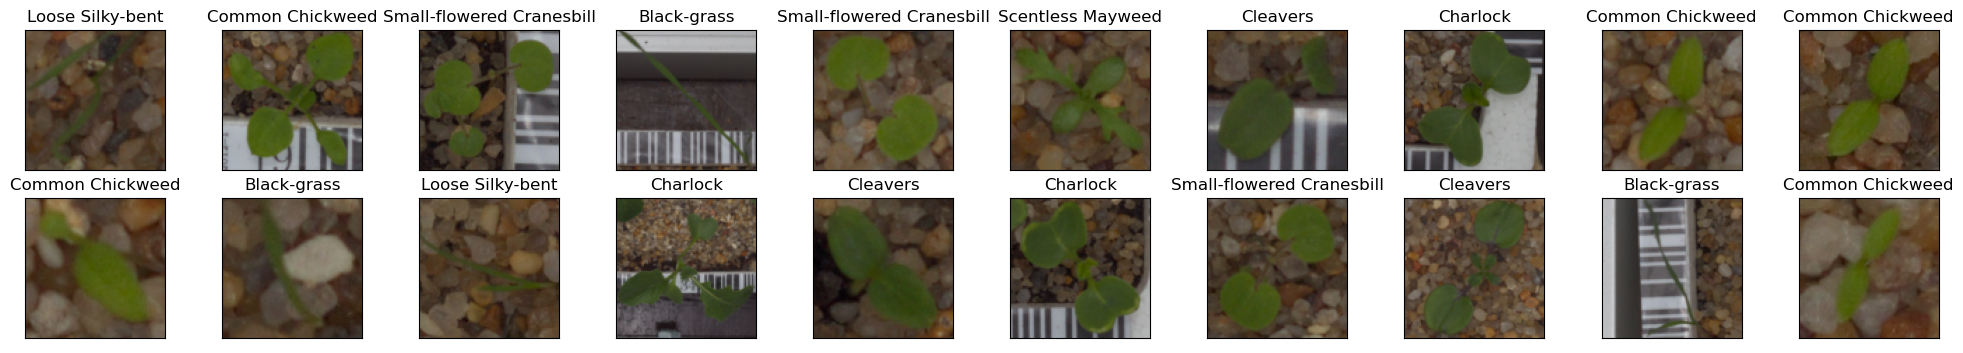

In [22]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 10 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [23]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

In [24]:
# model = models.mobilenet_v3_large(pretrained=True)

In [25]:
# for param in model.parameters():
#      param.requires_grad = False

In [26]:
import torch.nn as nn
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 128, 2, padding=1)
        self.norm1 = nn.BatchNorm2d(128)

        self.conv2 = nn.Conv2d(128, 160, 2, padding=1)
        self.norm2 = nn.BatchNorm2d(160)
        
        self.conv3 = nn.Conv2d(160, 256, 2, padding=1)
        self.norm3 = nn.BatchNorm2d(256)
        
        self.conv4 = nn.Conv2d(256, 324, 2, padding=1)
        self.norm4 = nn.BatchNorm2d(324)

        self.conv5 = nn.Conv2d(324, 256, 2, padding=1)
        self.norm5 = nn.BatchNorm2d(256)
        
        self.conv6 = nn.Conv2d(256, 128, 2, padding=1)
        self.norm6 = nn.BatchNorm2d(128)

        # max pooling layer
        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(1, 1)

        self.fc1 = nn.Linear(128 * 5 * 5, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 12)
        
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        
        x = self.norm1(self.pool1(F.leaky_relu(self.conv1(x))))
        
#         x = self.dropout(x)
        
        x = self.norm2(self.pool1(F.leaky_relu(self.conv2(x))))
        
#         x = self.dropout(x)
        
        x = self.norm3(self.pool1(F.leaky_relu(self.conv3(x))))
        
#         x = self.dropout(x)
        
        x = self.norm4(self.pool1(F.leaky_relu(self.conv4(x))))
        
#         x = self.dropout(x)
        
        x = self.norm5(self.pool1(F.leaky_relu(self.conv5(x))))
        
#         x = self.dropout(x)
        
        x = self.norm6(self.pool2(F.leaky_relu(self.conv6(x))))
        

#         x = self.dropout(x)

#         # flatten image input
        x = x.view(-1, 128 * 5 * 5)

        x = F.leaky_relu(self.fc1(x))

#         x = self.dropout(x)

        x = F.leaky_relu(self.fc2(x))

#         x = self.dropout(x)
        
        x = F.leaky_relu(self.fc3(x))

#         x = self.dropout(x)

        x = F.log_softmax(self.fc4(x), dim=1)

        return x

# create a complete CNN
model = Net().cuda()
print(model)

Net(
  (conv1): Conv2d(3, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (norm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(128, 160, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (norm2): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(160, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 324, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (norm4): BatchNorm2d(324, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(324, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (norm5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(256, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (norm6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=Tru

In [27]:
# model.classifier = nn.Sequential(nn.Linear(960, 1280),
#                                   nn.ReLU(),
#                                   nn.Dropout(0.2),
#                                   nn.Linear(1280, 12))

# move tensors to GPU if CUDA is available
# if train_on_gpu:
#     model.cuda()

In [28]:
# for param in model.parameters():
#      print(param.requires_grad)

In [29]:
images, labels = dataiter.next()
images, labels = images.cuda(), labels.cuda()

In [30]:
model(images).shape

torch.Size([42, 12])

In [31]:
train_data.classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [32]:
# specify loss function
# criterion = nn.CrossEntropyLoss()

# specify optimizer
# optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

from torch import optim
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=3e-5)

---
## Train the Network

In [33]:
# track valid loss
valid_loss = 0.0
class_correct = list(0. for i in range(12))
class_total = list(0. for i in range(12))

model.eval()
# iterate over valid data
for data, target in valid_loader:
    # move tensors to GPU if CUDA is available
    data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update valid loss 
    valid_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    # calculate valid accuracy for each object class
    for i in range(target.shape[0]):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average valid loss
valid_loss = valid_loss/len(valid_loader.dataset)
print('valid Loss: {:.6f}\n'.format(valid_loss))

for i in range(12):
    if class_total[i] > 0:
        print('valid Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('valid Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nvalid Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

valid Loss: 0.502660

valid Accuracy of Black-grass:  0% ( 0/52)
valid Accuracy of Charlock:  0% ( 0/80)
valid Accuracy of Cleavers:  0% ( 0/60)
valid Accuracy of Common Chickweed:  0% ( 0/117)
valid Accuracy of Common wheat:  0% ( 0/42)
valid Accuracy of Fat Hen: 100% (96/96)
valid Accuracy of Loose Silky-bent:  0% ( 0/118)
valid Accuracy of Maize:  0% ( 0/50)
valid Accuracy of Scentless Mayweed:  0% ( 0/113)
valid Accuracy of Shepherds Purse:  0% ( 0/46)
valid Accuracy of Small-flowered Cranesbill:  0% ( 0/98)
valid Accuracy of Sugar beet:  0% ( 0/88)

valid Accuracy (Overall): 10% (96/960)


In [45]:
# number of epochs to train the model
n_epochs = 40 # you may increase this number to train a final model

valid_loss_min = 0.044181 # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    with torch.no_grad():
        for data, target in valid_loader:
            # move tensors to GPU if CUDA is available
            data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_se.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.140331 	Validation Loss: 0.054584
Epoch: 2 	Training Loss: 0.123752 	Validation Loss: 0.051698
Epoch: 3 	Training Loss: 0.125478 	Validation Loss: 0.056059
Epoch: 4 	Training Loss: 0.135732 	Validation Loss: 0.046486
Validation loss decreased (0.049860 --> 0.046486).  Saving model ...
Epoch: 5 	Training Loss: 0.130317 	Validation Loss: 0.051041
Epoch: 6 	Training Loss: 0.129256 	Validation Loss: 0.053853
Epoch: 7 	Training Loss: 0.114423 	Validation Loss: 0.061731
Epoch: 8 	Training Loss: 0.134515 	Validation Loss: 0.049688
Epoch: 9 	Training Loss: 0.127209 	Validation Loss: 0.049911
Epoch: 10 	Training Loss: 0.113674 	Validation Loss: 0.048791
Epoch: 11 	Training Loss: 0.137401 	Validation Loss: 0.052003
Epoch: 12 	Training Loss: 0.123568 	Validation Loss: 0.050334
Epoch: 13 	Training Loss: 0.137665 	Validation Loss: 0.046906
Epoch: 14 	Training Loss: 0.129418 	Validation Loss: 0.058731
Epoch: 15 	Training Loss: 0.125346 	Validation Loss: 0.049939
Epoch: 16 

In [34]:
model.load_state_dict(torch.load('model_se.pt'))

<All keys matched successfully>

In [35]:
# track valid loss
valid_loss = 0.0
class_correct = list(0. for i in range(12))
class_total = list(0. for i in range(12))

model.eval()
# iterate over valid data
for data, target in valid_loader:
    # move tensors to GPU if CUDA is available
    data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update valid loss 
    valid_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    # calculate valid accuracy for each object class
    for i in range(target.shape[0]):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average valid loss
valid_loss = valid_loss/len(valid_loader.dataset)
print('valid Loss: {:.6f}\n'.format(valid_loss))

for i in range(12):
    if class_total[i] > 0:
        print('valid Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('valid Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nvalid Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

valid Loss: 0.010056

valid Accuracy of Black-grass: 90% (47/52)
valid Accuracy of Charlock: 100% (80/80)
valid Accuracy of Cleavers: 100% (60/60)
valid Accuracy of Common Chickweed: 100% (117/117)
valid Accuracy of Common wheat: 100% (42/42)
valid Accuracy of Fat Hen: 100% (96/96)
valid Accuracy of Loose Silky-bent: 100% (118/118)
valid Accuracy of Maize: 98% (49/50)
valid Accuracy of Scentless Mayweed: 98% (111/113)
valid Accuracy of Shepherds Purse: 97% (45/46)
valid Accuracy of Small-flowered Cranesbill: 98% (97/98)
valid Accuracy of Sugar beet: 98% (87/88)

valid Accuracy (Overall): 98% (949/960)


In [36]:
import pandas as pd

In [37]:
submission = pd.read_csv('C:/datasets/plant-seedlings-classification/sample_submission.csv'); submission

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet
...,...,...
789,fea355851.png,Sugar beet
790,fea3da57c.png,Sugar beet
791,fef2ade8c.png,Sugar beet
792,ff65bc002.png,Sugar beet


In [38]:
test_data = datasets.ImageFolder(data_dir + '/test', transform=transforms)

In [39]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, num_workers=num_workers)

In [50]:
array_of_preds = []
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    array_of_preds.extend(pred.cpu().detach().numpy())

In [53]:
submission['species'] = array_of_preds

In [57]:
sorted(submission['species'].unique()) == [i for i in range(0,12)]

True

In [60]:
for i in range(0,12):
    submission['species'] = submission['species'].replace(i, classes[i])

In [62]:
submission.to_csv('C:/datasets/plant-seedlings-classification/submis01.csv', index=False)

In [63]:
pd.read_csv('C:/datasets/plant-seedlings-classification/submis01.csv')

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet
...,...,...
789,fea355851.png,Loose Silky-bent
790,fea3da57c.png,Sugar beet
791,fef2ade8c.png,Sugar beet
792,ff65bc002.png,Charlock


In [64]:
# 300/885 on Kaggle